## HW1: Autoencoder From Scratch in PyTorch

### Part 1: Autoencoder Implementation and Training

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Along with the reduction side, a reconstructing side is also learned, where the autoencoder tries to generate from the reduced encoding a representation as close as possible to its original input, hence its name.

It looks like this:

```
Input Layer --> Encoder --> Latent Space --> Decoder --> Output Layer
```

Where:
- **Input Layer**: The original data that we want to compress.
- **Encoder**: The part of the network that compresses the input data into a lower-dimensional representation (latent space).
- **Latent Space**: The compressed representation of the input data.
- **Decoder**: The part of the network that reconstructs the original data from the compressed representation.
- **Output Layer**: The reconstructed data that should be as close as possible to the original input.

Mathematically, an autoencoder consists of two main functions:
1. **Encoder Function**: \( h = f(x) \)
   - Where \( x \) is the input data, \( f \) is the encoder function, and \( h \) is the latent representation.
2. **Decoder Function**: \( r = g(h) \)
   - Where \( h \) is the latent representation, \( g \) is the decoder function, and \( r \) is the reconstructed output.

In this homework, you will implement a simple autoencoder using PyTorch. The autoencoder will be trained on the MNIST dataset, which consists of handwritten digits.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
validation_dataset = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
validation_dataloader = DataLoader(validation_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:13<00:00, 758448.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 176375.67it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:02<00:00, 681134.34it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2900506.82it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



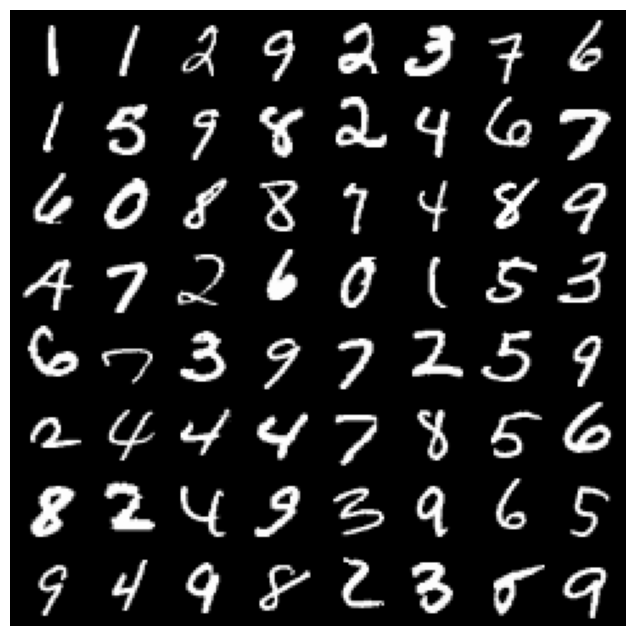

Shape of the batch: torch.Size([64, 784])


In [4]:
import seaborn as sns
sns.set(style='whitegrid')

for epoch in range(5):
    for data in dataloader:
        imgs, _ = data
        imgs = imgs.view(imgs.size(0), -1)
        # draw the images
        plt.figure(figsize=(8, 8))
        plt.axis('off')
        plt.imshow(np.transpose(torchvision.utils.make_grid(imgs.view(-1, 1, 28, 28), nrow=8, padding=2, normalize=True).cpu(), (1, 2, 0)))
        plt.show()
        print(f"Shape of the batch: {imgs.shape}")
        break
    break

In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
        )

        self.decoder = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)

        return self.decoder(x)

Training Epoch 1/5: 100%|██████████| 938/938 [00:02<00:00, 338.55it/s]


Epoch [1/5], Loss: 0.0459


Overall Training Progress:  20%|██        | 1/5 [00:03<00:12,  3.02s/it]

Validation Loss: 0.0292
Epoch [1/5], Validation Loss: 0.0292


Training Epoch 2/5: 100%|██████████| 938/938 [00:01<00:00, 488.60it/s]


Epoch [2/5], Loss: 0.0260


Overall Training Progress:  40%|████      | 2/5 [00:05<00:07,  2.51s/it]

Validation Loss: 0.0231
Epoch [2/5], Validation Loss: 0.0231


Training Epoch 3/5: 100%|██████████| 938/938 [00:02<00:00, 462.31it/s]


Epoch [3/5], Loss: 0.0217


Overall Training Progress:  60%|██████    | 3/5 [00:07<00:04,  2.40s/it]

Validation Loss: 0.0195
Epoch [3/5], Validation Loss: 0.0195


Training Epoch 4/5: 100%|██████████| 938/938 [00:01<00:00, 472.97it/s]


Epoch [4/5], Loss: 0.0192


Overall Training Progress:  80%|████████  | 4/5 [00:09<00:02,  2.33s/it]

Validation Loss: 0.0183
Epoch [4/5], Validation Loss: 0.0183


Training Epoch 5/5: 100%|██████████| 938/938 [00:02<00:00, 441.01it/s]


Epoch [5/5], Loss: 0.0180


Overall Training Progress: 100%|██████████| 5/5 [00:12<00:00,  2.41s/it]

Validation Loss: 0.0171
Epoch [5/5], Validation Loss: 0.0171
Training complete.


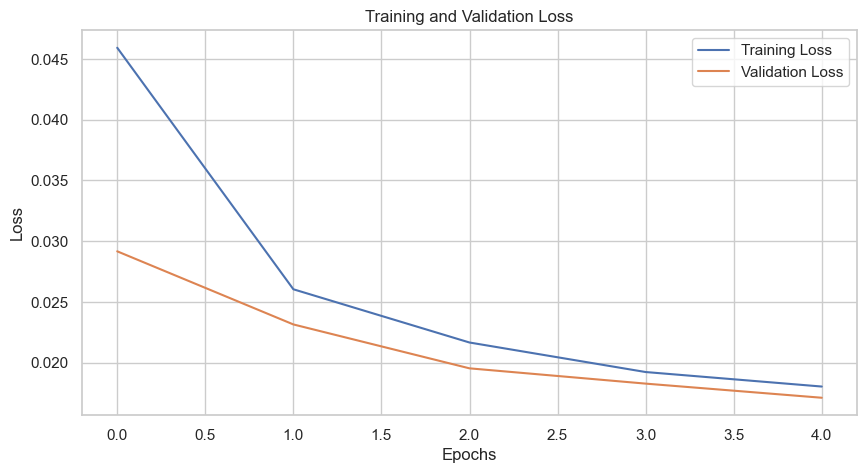

In [6]:
from tqdm import tqdm

def train_autoencoder(model, dataloader, validation_dataloader, num_epochs=20, learning_rate=1e-3):

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    history = {'loss': [], 'running_loss': [], 'val_loss': []}

    for epoch in tqdm(range(num_epochs), desc="Overall Training Progress"):

        #remeber this flag during training
        # it enables things like dropout and batchnorm
        model.train()
        running_loss = 0.0

        for data in tqdm(dataloader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
            imgs, _ = data
            imgs = imgs.view(imgs.size(0), -1)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, imgs)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            history['running_loss'].append(loss.item())

        avg_loss = running_loss / len(dataloader)

        history['loss'].append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

        avg_val_loss = validate_autoencoder(model, validation_dataloader)
        history['val_loss'].append(avg_val_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}")
    print("Training complete.")

    return history

def validate_autoencoder(model, validation_dataloader):
    #remember this flag: it disables things like dropout and batchnorm
    model.eval()

    criterion = nn.MSELoss()
    val_loss = 0.0

    # no_grad context is used to disable gradient calculation
    with torch.no_grad():
        for data in validation_dataloader:
            imgs, _ = data
            imgs = imgs.view(imgs.size(0), -1)
            outputs = model(imgs)
            loss = criterion(outputs, imgs)

            val_loss += loss.item()

    avg_val_loss = val_loss / len(validation_dataloader)
    print(f"Validation Loss: {avg_val_loss:.4f}")
    return avg_val_loss

autoencoder = Autoencoder()

# DO NOT CHANGE BELOW

history = train_autoencoder(autoencoder, dataloader, validation_dataloader, num_epochs=5, learning_rate=1e-3)
plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

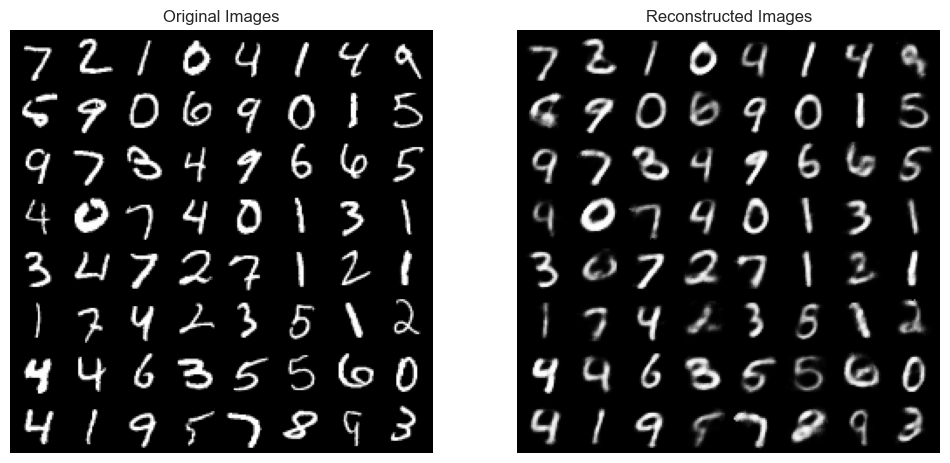

In [7]:
# DO NOT CHANGE THE FUNCTIONS BELOW

def inference_autoencoder(model, images):
    model.eval()
    with torch.no_grad():
        images = images.view(images.size(0), -1)
        outputs = model(images)
    return outputs
# Get a batch of validation images
dataiter = iter(validation_dataloader)
images, labels = next(dataiter)
# Reconstruct the images using the autoencoder
reconstructed = inference_autoencoder(autoencoder, images)



# Display original and reconstructed images
plt.figure(figsize=(12, 6))
# Original images
plt.subplot(1, 2, 1)
plt.title('Original Images')
plt.axis('off')
plt.imshow(np.transpose(torchvision.utils.make_grid(images.view(-1, 1, 28, 28), nrow=8, padding=2, normalize=True).cpu(), (1, 2, 0)))
# Reconstructed images
plt.subplot(1, 2, 2)
plt.title('Reconstructed Images')
plt.axis('off')
plt.imshow(np.transpose(torchvision.utils.make_grid(reconstructed.view(-1, 1, 28, 28), nrow=8, padding=2, normalize=True).cpu(), (1, 2, 0)))
plt.show()

## Part 2: Autoencoder with a weird twist !!

In this task, you will implement the training and validation loops for an autoencoder model using PyTorch. The autoencoder will be trained to reconstruct images from the MNIST dataset. You will need to define the loss function and the optimizer, and implement the training and validation steps.

The twist is that you will need to also add a seperate classification head to the autoencoder, and train it to classify the digits as well. The classification head will take the latent representation from the encoder and output a probability distribution over the 10 classes (digits 0-9).

The architecture of the autoencoder with the classification head is as follows:

```
Input Layer --> Encoder --> Latent Space --> Decoder --> Output Layer
                                      |
                                      --> Classifier --> Class Probabilities
```


In [ ]:
#add a seperate head to classify the digits based on the encoded representation

class AutoencoderWithClassifier(nn.Module):
    def __init__(self):
        super(AutoencoderWithClassifier, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
        )

        self.decoder = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )

        # Softmax activation (use nn.CrossEntropyLoss in the training which applies softmax internally)
        self.classifier = nn.Sequential(
            nn.Linear(12, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
        )

    def forward(self, x):
        encoded_x = self.encoder(x)
        decoded = self.decoder(encoded_x)
        class_logits = self.classifier(encoded_x)
        return decoded, class_logits


In [ ]:
def train_autoencoder_with_classifier(model, dataloader, validation_dataloader, num_epochs=20, learning_rate=1e-3):
    reconstruction_criterion = nn.MSELoss()

    classification_criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    history = {'reconstruction_loss': [], 'classification_loss': [], 'val_reconstruction_loss': [], 'val_classification_loss': []}
    for epoch in tqdm(range(num_epochs), desc="Overall Training Progress"):
        model.train()
        running_reconstruction_loss = 0.0
        running_classification_loss = 0.0
        for data in tqdm(dataloader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
            imgs, labels = data
            imgs = imgs.view(imgs.size(0), -1)

            # Forward pass
            optimizer.zero_grad()
            reconstructed, class_logits = model(imgs)


            reconstruction_loss = reconstruction_criterion(reconstructed, imgs)
            classification_loss = classification_criterion(class_logits, labels)
            total_loss = reconstruction_loss + classification_loss
            total_loss.backward()
            optimizer.step()
            
            running_reconstruction_loss += reconstruction_loss.item()
            running_classification_loss += classification_loss.item()

        avg_reconstruction_loss = running_reconstruction_loss / len(dataloader)
        avg_classification_loss = running_classification_loss / len(dataloader)
        history['reconstruction_loss'].append(avg_reconstruction_loss)
        history['classification_loss'].append(avg_classification_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Reconstruction Loss: {avg_reconstruction_loss:.4f}, Classification Loss: {avg_classification_loss:.4f}")
        avg_val_reconstruction_loss, avg_val_classification_loss = validate_autoencoder_with_classifier(model, validation_dataloader)
        history['val_reconstruction_loss'].append(avg_val_reconstruction_loss)
        history['val_classification_loss'].append(avg_val_classification_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Reconstruction Loss: {avg_val_reconstruction_loss:.4f}, Validation Classification Loss: {avg_val_classification_loss:.4f}")
    print("Training complete.")
    return history

def validate_autoencoder_with_classifier(model, validation_dataloader):
    model.eval()
    reconstruction_criterion = nn.MSELoss()
    classification_criterion = nn.CrossEntropyLoss()
    val_reconstruction_loss = 0.0
    val_classification_loss = 0.0
    with torch.no_grad():
        for data in validation_dataloader:
            imgs, labels = data
            imgs = imgs.view(imgs.size(0), -1)
            reconstructed, class_logits = model(imgs)
            reconstruction_loss = reconstruction_criterion(reconstructed, imgs.view(-1, 1, 28 * 28))
            classification_loss = classification_criterion(class_logits, labels)
            val_reconstruction_loss += reconstruction_loss.item()
            val_classification_loss += classification_loss.item()
    avg_val_reconstruction_loss = val_reconstruction_loss / len(validation_dataloader)
    avg_val_classification_loss = val_classification_loss / len(validation_dataloader)
    print(f"Validation Reconstruction Loss: {avg_val_reconstruction_loss:.4f}, Validation Classification Loss: {avg_val_classification_loss:.4f}")
    return avg_val_reconstruction_loss, avg_val_classification_loss

autoencoder_with_classifier = AutoencoderWithClassifier()
history_with_classifier = train_autoencoder_with_classifier(autoencoder_with_classifier, dataloader, validation_dataloader, num_epochs=5, learning_rate=1e-3)


Training Epoch 1/5: 100%|██████████| 938/938 [00:02<00:00, 440.08it/s]
/Users/abughdaryan/miniconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([64, 1, 784])) that is different to the input size (torch.Size([64, 784])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/5], Reconstruction Loss: 0.0513, Classification Loss: 1.7621


/Users/abughdaryan/miniconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([16, 1, 784])) that is different to the input size (torch.Size([16, 784])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Overall Training Progress:  20%|██        | 1/5 [00:02<00:09,  2.41s/it]

Validation Reconstruction Loss: 0.0900, Validation Classification Loss: 1.6347
Epoch [1/5], Validation Reconstruction Loss: 0.0900, Validation Classification Loss: 1.6347


Training Epoch 2/5: 100%|██████████| 938/938 [00:02<00:00, 462.12it/s]


Epoch [2/5], Reconstruction Loss: 0.0343, Classification Loss: 1.6159


Overall Training Progress:  40%|████      | 2/5 [00:04<00:07,  2.35s/it]

Validation Reconstruction Loss: 0.0984, Validation Classification Loss: 1.6088
Epoch [2/5], Validation Reconstruction Loss: 0.0984, Validation Classification Loss: 1.6088


Training Epoch 3/5: 100%|██████████| 938/938 [00:02<00:00, 442.94it/s]


Epoch [3/5], Reconstruction Loss: 0.0300, Classification Loss: 1.5573


Overall Training Progress:  60%|██████    | 3/5 [00:07<00:04,  2.39s/it]

Validation Reconstruction Loss: 0.1002, Validation Classification Loss: 1.5234
Epoch [3/5], Validation Reconstruction Loss: 0.1002, Validation Classification Loss: 1.5234


Training Epoch 4/5: 100%|██████████| 938/938 [00:02<00:00, 446.41it/s]


Epoch [4/5], Reconstruction Loss: 0.0278, Classification Loss: 1.5130


Overall Training Progress:  80%|████████  | 4/5 [00:09<00:02,  2.38s/it]

Validation Reconstruction Loss: 0.1035, Validation Classification Loss: 1.5095
Epoch [4/5], Validation Reconstruction Loss: 0.1035, Validation Classification Loss: 1.5095


Training Epoch 5/5: 100%|██████████| 938/938 [00:02<00:00, 463.83it/s]


Epoch [5/5], Reconstruction Loss: 0.0263, Classification Loss: 1.5047


Overall Training Progress: 100%|██████████| 5/5 [00:11<00:00,  2.36s/it]

Validation Reconstruction Loss: 0.1043, Validation Classification Loss: 1.5094
Epoch [5/5], Validation Reconstruction Loss: 0.1043, Validation Classification Loss: 1.5094
Training complete.


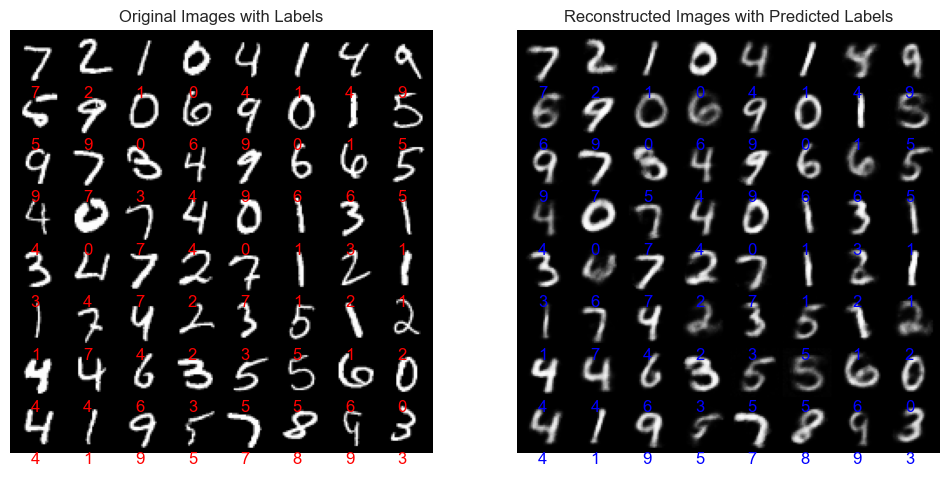

In [12]:
# DO NOT CHANGE THE FUNCTION BELOW

def visualize_reconstructions_with_labels(model, dataloader):
    model.eval()
    dataiter = iter(dataloader)
    images, labels = next(dataiter)
    with torch.no_grad():
        images_flat = images.view(images.size(0), -1)
        reconstructed, class_logits = model(images_flat)
        _, predicted_labels = torch.max(class_logits, 1)

    plt.figure(figsize=(12, 6))
    # Original images
    plt.subplot(1, 2, 1)
    plt.title('Original Images with Labels')
    plt.axis('off')
    grid_img = torchvision.utils.make_grid(images.view(-1, 1, 28, 28), nrow=8, padding=2, normalize=True).cpu()
    plt.imshow(np.transpose(grid_img, (1, 2, 0)))
    for i in range(len(labels)):
        plt.text((i % 8) * (28 + 2) + 14, (i // 8) * (28 + 2) + 28 + 10, str(labels[i].item()), color='red', fontsize=12, ha='center')

    # Reconstructed images
    plt.subplot(1, 2, 2)
    plt.title('Reconstructed Images with Predicted Labels')
    plt.axis('off')
    grid_reconstructed = torchvision.utils.make_grid(reconstructed.view(-1, 1, 28, 28), nrow=8, padding=2, normalize=True).cpu()
    plt.imshow(np.transpose(grid_reconstructed, (1, 2, 0)))
    for i in range(len(predicted_labels)):
        plt.text((i % 8) * (28 + 2) + 14, (i // 8) * (28 + 2) + 28 + 10, str(predicted_labels[i].item()), color='blue', fontsize=12, ha='center')

    plt.show()
visualize_reconstructions_with_labels(autoencoder_with_classifier, validation_dataloader)

# Part 3: Questions

Answer the following questions as elaborately as possible:

**Question 1**: What is the purpose of the latent space in an autoencoder?

**Answer 1**: The purpose is to compress and then de-compress images and latent space represents space where each image is compressed vector.

**Question 2**: How does the choice of loss function affect the training of an autoencoder?

**Answer 2**:

                MSE: Minimizes squared differences, favors average reconstructions (blurry images).
                MAE: Produces sharper reconstructions, more robust to noise.

**Question 3**: Does training an autoencoder with a classification head improve the quality of the learned representations? Why or why not?


**Answer 3**: It should improve the quality, since we add extra supervision and extra information to our training.

# Part 4: Another twist to the autoencoder (extra credit)

Add the following modifications to the autoencoder:
1. **Classification Head**: Add a classification head to the autoencoder that takes the final (NOT THE LATENT) encoded representation and outputs class probabilities for the 10 classes (digits 0-9).
2. **Loss Function**: Use a combined loss function that includes both the reconstruction loss (MSELoss) and the classification loss (CrossEntropyLoss). (like in the previous part)
3. **Training Loop**: Implement the training loop to optimize both the reconstruction and classification losses.




In [ ]:
class AutoencoderWithClassifierOnFinal(nn.Module):
    def __init__(self):
        super(AutoencoderWithClassifierOnFinal, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
        )

        self.decoder = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )

        self.classifier = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        encoded_x = self.encoder(x)
        decoded = self.decoder(encoded_x)
        class_logits = self.classifier(decoded)
        return decoded, class_logits


In [14]:
def train_autoencoder_with_classifier_on_final(model, dataloader, validation_dataloader, num_epochs=20, learning_rate=1e-3):
    reconstruction_criterion = nn.MSELoss()

    classification_criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    history = {'reconstruction_loss': [], 'classification_loss': [], 'val_reconstruction_loss': [], 'val_classification_loss': []}
    for epoch in tqdm(range(num_epochs), desc="Overall Training Progress"):
        model.train()
        running_reconstruction_loss = 0.0
        running_classification_loss = 0.0
        for data in tqdm(dataloader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
            imgs, labels = data
            imgs = imgs.view(imgs.size(0), -1)

            # Forward pass
            optimizer.zero_grad()
            reconstructed, class_logits = model(imgs)


            reconstruction_loss = reconstruction_criterion(reconstructed, imgs)
            classification_loss = classification_criterion(class_logits, labels)
            total_loss = reconstruction_loss + classification_loss
            total_loss.backward()
            optimizer.step()
            
            running_reconstruction_loss += reconstruction_loss.item()
            running_classification_loss += classification_loss.item()

        avg_reconstruction_loss = running_reconstruction_loss / len(dataloader)
        avg_classification_loss = running_classification_loss / len(dataloader)
        history['reconstruction_loss'].append(avg_reconstruction_loss)
        history['classification_loss'].append(avg_classification_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Reconstruction Loss: {avg_reconstruction_loss:.4f}, Classification Loss: {avg_classification_loss:.4f}")
        avg_val_reconstruction_loss, avg_val_classification_loss = validate_autoencoder_with_classifier(model, validation_dataloader)
        history['val_reconstruction_loss'].append(avg_val_reconstruction_loss)
        history['val_classification_loss'].append(avg_val_classification_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Reconstruction Loss: {avg_val_reconstruction_loss:.4f}, Validation Classification Loss: {avg_val_classification_loss:.4f}")
    print("Training complete.")
    return history

def validate_autoencoder_with_classifier_on_final(model, validation_dataloader):
    model.eval()
    reconstruction_criterion = nn.MSELoss()
    classification_criterion = nn.CrossEntropyLoss()
    val_reconstruction_loss = 0.0
    val_classification_loss = 0.0
    with torch.no_grad():
        for data in validation_dataloader:
            imgs, labels = data
            imgs = imgs.view(imgs.size(0), -1)
            reconstructed, class_logits = model(imgs)
            reconstruction_loss = reconstruction_criterion(reconstructed, imgs.view(-1, 1, 28 * 28))
            classification_loss = classification_criterion(class_logits, labels)
            val_reconstruction_loss += reconstruction_loss.item()
            val_classification_loss += classification_loss.item()
    avg_val_reconstruction_loss = val_reconstruction_loss / len(validation_dataloader)
    avg_val_classification_loss = val_classification_loss / len(validation_dataloader)
    print(f"Validation Reconstruction Loss: {avg_val_reconstruction_loss:.4f}, Validation Classification Loss: {avg_val_classification_loss:.4f}")
    return avg_val_reconstruction_loss, avg_val_classification_loss

autoencoder_with_classifier = AutoencoderWithClassifierOnFinal()
history_with_classifier = train_autoencoder_with_classifier_on_final(autoencoder_with_classifier, dataloader, validation_dataloader, num_epochs=5, learning_rate=1e-3)


Training Epoch 1/5: 100%|██████████| 938/938 [00:02<00:00, 399.51it/s]
/Users/abughdaryan/miniconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([64, 1, 784])) that is different to the input size (torch.Size([64, 784])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/5], Reconstruction Loss: 0.0950, Classification Loss: 1.0157


/Users/abughdaryan/miniconda3/envs/torch/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([16, 1, 784])) that is different to the input size (torch.Size([16, 784])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Overall Training Progress:  20%|██        | 1/5 [00:02<00:10,  2.64s/it]

Validation Reconstruction Loss: 0.1028, Validation Classification Loss: 0.3861
Epoch [1/5], Validation Reconstruction Loss: 0.1028, Validation Classification Loss: 0.3861


Training Epoch 2/5: 100%|██████████| 938/938 [00:02<00:00, 414.03it/s]


Epoch [2/5], Reconstruction Loss: 0.0843, Classification Loss: 0.2594


Overall Training Progress:  40%|████      | 2/5 [00:05<00:07,  2.59s/it]

Validation Reconstruction Loss: 0.0918, Validation Classification Loss: 0.2217
Epoch [2/5], Validation Reconstruction Loss: 0.0918, Validation Classification Loss: 0.2217


Training Epoch 3/5: 100%|██████████| 938/938 [00:02<00:00, 352.39it/s]


Epoch [3/5], Reconstruction Loss: 0.0745, Classification Loss: 0.1579


Overall Training Progress:  60%|██████    | 3/5 [00:08<00:05,  2.76s/it]

Validation Reconstruction Loss: 0.0889, Validation Classification Loss: 0.1601
Epoch [3/5], Validation Reconstruction Loss: 0.0889, Validation Classification Loss: 0.1601


Training Epoch 4/5: 100%|██████████| 938/938 [00:02<00:00, 387.05it/s]


Epoch [4/5], Reconstruction Loss: 0.0693, Classification Loss: 0.1199


Overall Training Progress:  80%|████████  | 4/5 [00:10<00:02,  2.74s/it]

Validation Reconstruction Loss: 0.0887, Validation Classification Loss: 0.1499
Epoch [4/5], Validation Reconstruction Loss: 0.0887, Validation Classification Loss: 0.1499


Training Epoch 5/5: 100%|██████████| 938/938 [00:02<00:00, 370.73it/s]


Epoch [5/5], Reconstruction Loss: 0.0663, Classification Loss: 0.0956


Overall Training Progress: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]

Validation Reconstruction Loss: 0.0883, Validation Classification Loss: 0.1432
Epoch [5/5], Validation Reconstruction Loss: 0.0883, Validation Classification Loss: 0.1432
Training complete.


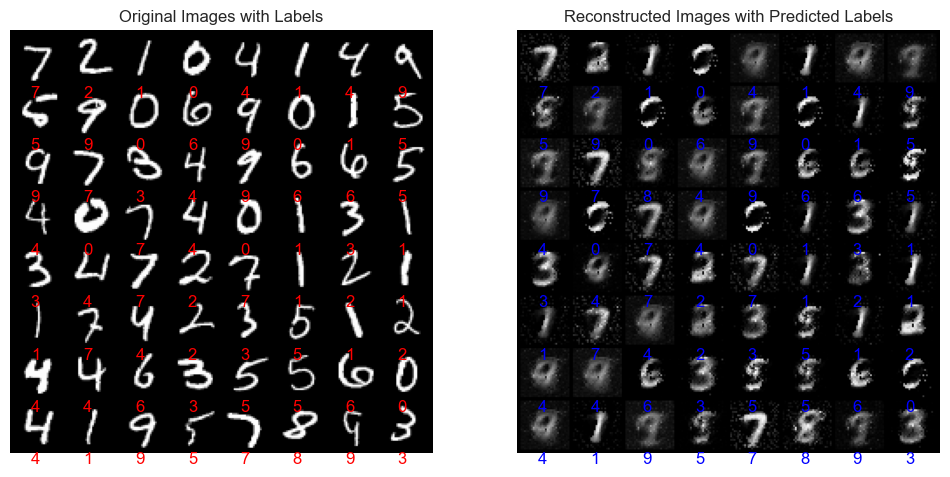

In [15]:
# DO NOT CHANGE THE FUNCTION BELOW

def visualize_reconstructions_with_labels(model, dataloader):
    model.eval()
    dataiter = iter(dataloader)
    images, labels = next(dataiter)
    with torch.no_grad():
        images_flat = images.view(images.size(0), -1)
        reconstructed, class_logits = model(images_flat)
        _, predicted_labels = torch.max(class_logits, 1)

    plt.figure(figsize=(12, 6))
    # Original images
    plt.subplot(1, 2, 1)
    plt.title('Original Images with Labels')
    plt.axis('off')
    grid_img = torchvision.utils.make_grid(images.view(-1, 1, 28, 28), nrow=8, padding=2, normalize=True).cpu()
    plt.imshow(np.transpose(grid_img, (1, 2, 0)))
    for i in range(len(labels)):
        plt.text((i % 8) * (28 + 2) + 14, (i // 8) * (28 + 2) + 28 + 10, str(labels[i].item()), color='red', fontsize=12, ha='center')

    # Reconstructed images
    plt.subplot(1, 2, 2)
    plt.title('Reconstructed Images with Predicted Labels')
    plt.axis('off')
    grid_reconstructed = torchvision.utils.make_grid(reconstructed.view(-1, 1, 28, 28), nrow=8, padding=2, normalize=True).cpu()
    plt.imshow(np.transpose(grid_reconstructed, (1, 2, 0)))
    for i in range(len(predicted_labels)):
        plt.text((i % 8) * (28 + 2) + 14, (i // 8) * (28 + 2) + 28 + 10, str(predicted_labels[i].item()), color='blue', fontsize=12, ha='center')

    plt.show()
visualize_reconstructions_with_labels(autoencoder_with_classifier, validation_dataloader)